<h2>About this Project</h2>
<p>In this project, you will implement your own perceptron. You'll implement a linear classifier and the perceptron update functions. You'll also have a chance to visualize your perceptron.</p>

<h3>Evaluation</h3>

<p><strong>This project must be successfully completed and submitted in order to receive credit for this course. Your score on this project will be included in your final grade calculation.</strong><p>
    
<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board (found in the Live Labs section of this course) to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
    <li><strong>Save your notebook —</strong> Click <strong>Save and Checkpoint</strong> in the "File" menu.</li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
</ol>

<h2>Getting Started</h2>
<h3>Python Initialization</h3> 

Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x. </p>

In [1]:
import numpy as np
import matplotlib 
import sys
import matplotlib.pyplot as plt
import time
sys.path.append('/home/codio/workspace/.guides/hf')
from helper import *


%matplotlib notebook
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.7


<h2>The Perceptron</h2>

<p>The perceptron is a basic linear classifier. The following cells will walk you through steps and ask you to finish the necessary functions in a pre-defined order. Code cells requiring your input will display # YOUR CODE HERE and graded portions will be adequately labeled. Unless specified otherwise, do not use loops.<br></p>

<h3>Part One: Perceptron Update [Graded]</h3>
<p>Implement the function below to update the perceptron given an input vector, label, and weight vector. Do <b>not</b> check if an update is necessary. This function can assume that it is only called when an update should be performed. Hint: Refer to the perceptron pseudocode page for help with implementing the update step.</p>

In [2]:
def perceptron_update(x,y,w):
    """
    function w=perceptron_update(x,y,w);
    
    Implementation of Perceptron weights updating
    Input:
    x : input vector of d dimensions (d)
    y : corresponding label (-1 or +1)
    w : weight vector of d dimensions
    
    Output:
    w : weight vector after updating (d)
    """
    
    # YOUR CODE HERE
    wFinal = y*x + w
    
    return wFinal
# little test
x = np.random.rand(10)
y = -1
w = np.random.rand(10)
w1 = perceptron_update(x,y,w)

In [3]:
# This self test will check that your perceptron_update function returns the correct values for input vector [0,1], label -1, and weight vector [1,1]

def test_perceptron_update1():
    x = np.array([0,1])
    y = -1
    w = np.array([1,1])
    w1 = perceptron_update(x,y,w)
    return (w1.reshape(-1,) == np.array([1,0])).all()

def test_perceptron_update2(): 
    x = np.random.rand(25)
    y = 1
    w = np.zeros(25)
    w1 = perceptron_update(x,y,w)
    return np.linalg.norm(w1-x)<1e-8


def test_perceptron_update3():
    x = np.random.rand(25)
    y = -1
    w = np.zeros(25)
    w1 = perceptron_update(x,y,w)
    return np.linalg.norm(w1+x)<1e-8


runtest(test_perceptron_update1, 'test_perceptron_update1')
runtest(test_perceptron_update2, 'test_perceptron_update2')
runtest(test_perceptron_update3, 'test_perceptron_update3')

Running Test: test_perceptron_update1 ... ✔ Passed!
Running Test: test_perceptron_update2 ... ✔ Passed!
Running Test: test_perceptron_update3 ... ✔ Passed!


In [4]:
# Autograder test cell- worth 1 point
# runs test_perceptron_update1

In [5]:
# Autograder test cell- worth 1 point
# runs test_perceptron_update2

In [6]:
# Autograder test cell- worth 1 point
# runs test_perceptron_update3

<h3>Part Two: Implement Perceptron [Graded]</h3>

<p>Implement function <b><code>perceptron</code></b>. This should contain a loop that calls 
<b><code>perceptron_update</code></b>
 until it converges or the maximum iteration count, 100, has been reached.
 Make sure you randomize the order of the training data on each iteration (you can use <b><code>np.random.permutation()</code></b> to do this.)</p>

In [7]:
def perceptron(xs,ys):
    """
    function w=perceptron(xs,ys);
    
    Implementation of a Perceptron classifier
    Input:
    xs : n input vectors of d dimensions (nxd)
    ys : n labels (-1 or +1)
    
    Output:
    w : weight vector (1xd)
    b : bias term
    """

    n, d = xs.shape     # so we have n input vectors, of d dimensions each
    w = np.zeros(d)
    b = 0.0
    
    # YOUR CODE HERE
    ep = 100
    k = 0
    
    #while (k < ep):
    for k in range(ep):
        m = 0
        for k in np.random.permutation(n):
            if ys[k]*(np.dot(w,xs[k])+b) <= 0:
                w = perceptron_update(xs[k],ys[k],w)
            b += ys[k]
            m += 1
            
        if (m == 0):
            break

    
     
    return (w, b)




In [8]:
# These self tests will check that your perceptron function successfully classifies points in two different linearly separable dataset 

def test_Perceptron1():
    N = 100;
    d = 10;
    x = np.random.rand(N,d)
    w = np.random.rand(1,d)
    y = np.sign(w.dot(x.T))[0]
    w, b = perceptron(x,y)
    preds = classify_linear_grader(x,w,b)
    return np.array_equal(preds.reshape(-1,),y.reshape(-1,))



def test_Perceptron2():
    x = np.array([ [-0.70072, -1.15826],  [-2.23769, -1.42917],  [-1.28357, -3.52909],  [-3.27927, -1.47949],  [-1.98508, -0.65195],  [-1.40251, -1.27096],  [-3.35145,-0.50274],  [-1.37491,-3.74950],  [-3.44509,-2.82399],  [-0.99489,-1.90591],   [0.63155,1.83584],   [2.41051,1.13768],  [-0.19401,0.62158],   [2.08617,4.41117],   [2.20720,1.24066],   [0.32384,3.39487],   [1.44111,1.48273],   [0.59591,0.87830],   [2.96363,3.00412],   [1.70080,1.80916]])
    y = np.array([1]*10 + [-1]*10)
    w, b =perceptron(x,y)
    preds = classify_linear_grader(x,w,b)
    return np.array_equal(preds.reshape(-1,),y.reshape(-1,))

runtest(test_Perceptron1, 'test_Perceptron1')
runtest(test_Perceptron2, 'test_Perceptron2')

Running Test: test_Perceptron1 ... ✔ Passed!
Running Test: test_Perceptron2 ... ✔ Passed!


In [9]:
# Autograder test cell- worth 1 point
# runs test_Perceptron1

In [10]:
# Autograder test cell- worth 1 point
# runs test_Perceptron2

<h3>Visualize Your Perceptron</h3>

<p> You can use the following script to test your code and visualize your perceptron on linearly separable data in 2 dimensions. Your classifier should find a separating hyperplane on such data.   </p>

In [11]:
# number of input vectors
N = 100

# generate random (linarly separable) data
xs = np.random.rand(N, 2)*10-5

# defining random hyperplane
w0 = np.random.rand(2)
b0 = np.random.rand()*2-1;

# assigning labels +1, -1 labels depending on what side of the plane they lie on
ys = np.sign(xs.dot(w0)+b0)

# call perceptron to find w from data
w,b = perceptron(xs.copy(),ys.copy())

# test if all points are classified correctly
assert (all(np.sign(ys*(xs.dot(w)+b))==1.0))  # yw'x should be +1.0 for every input
print("Looks like you passed the Perceptron test!")

# we can make a pretty visualization
visboundary(w,b,xs,ys)

AssertionError: 

<IPython.core.display.Javascript object>


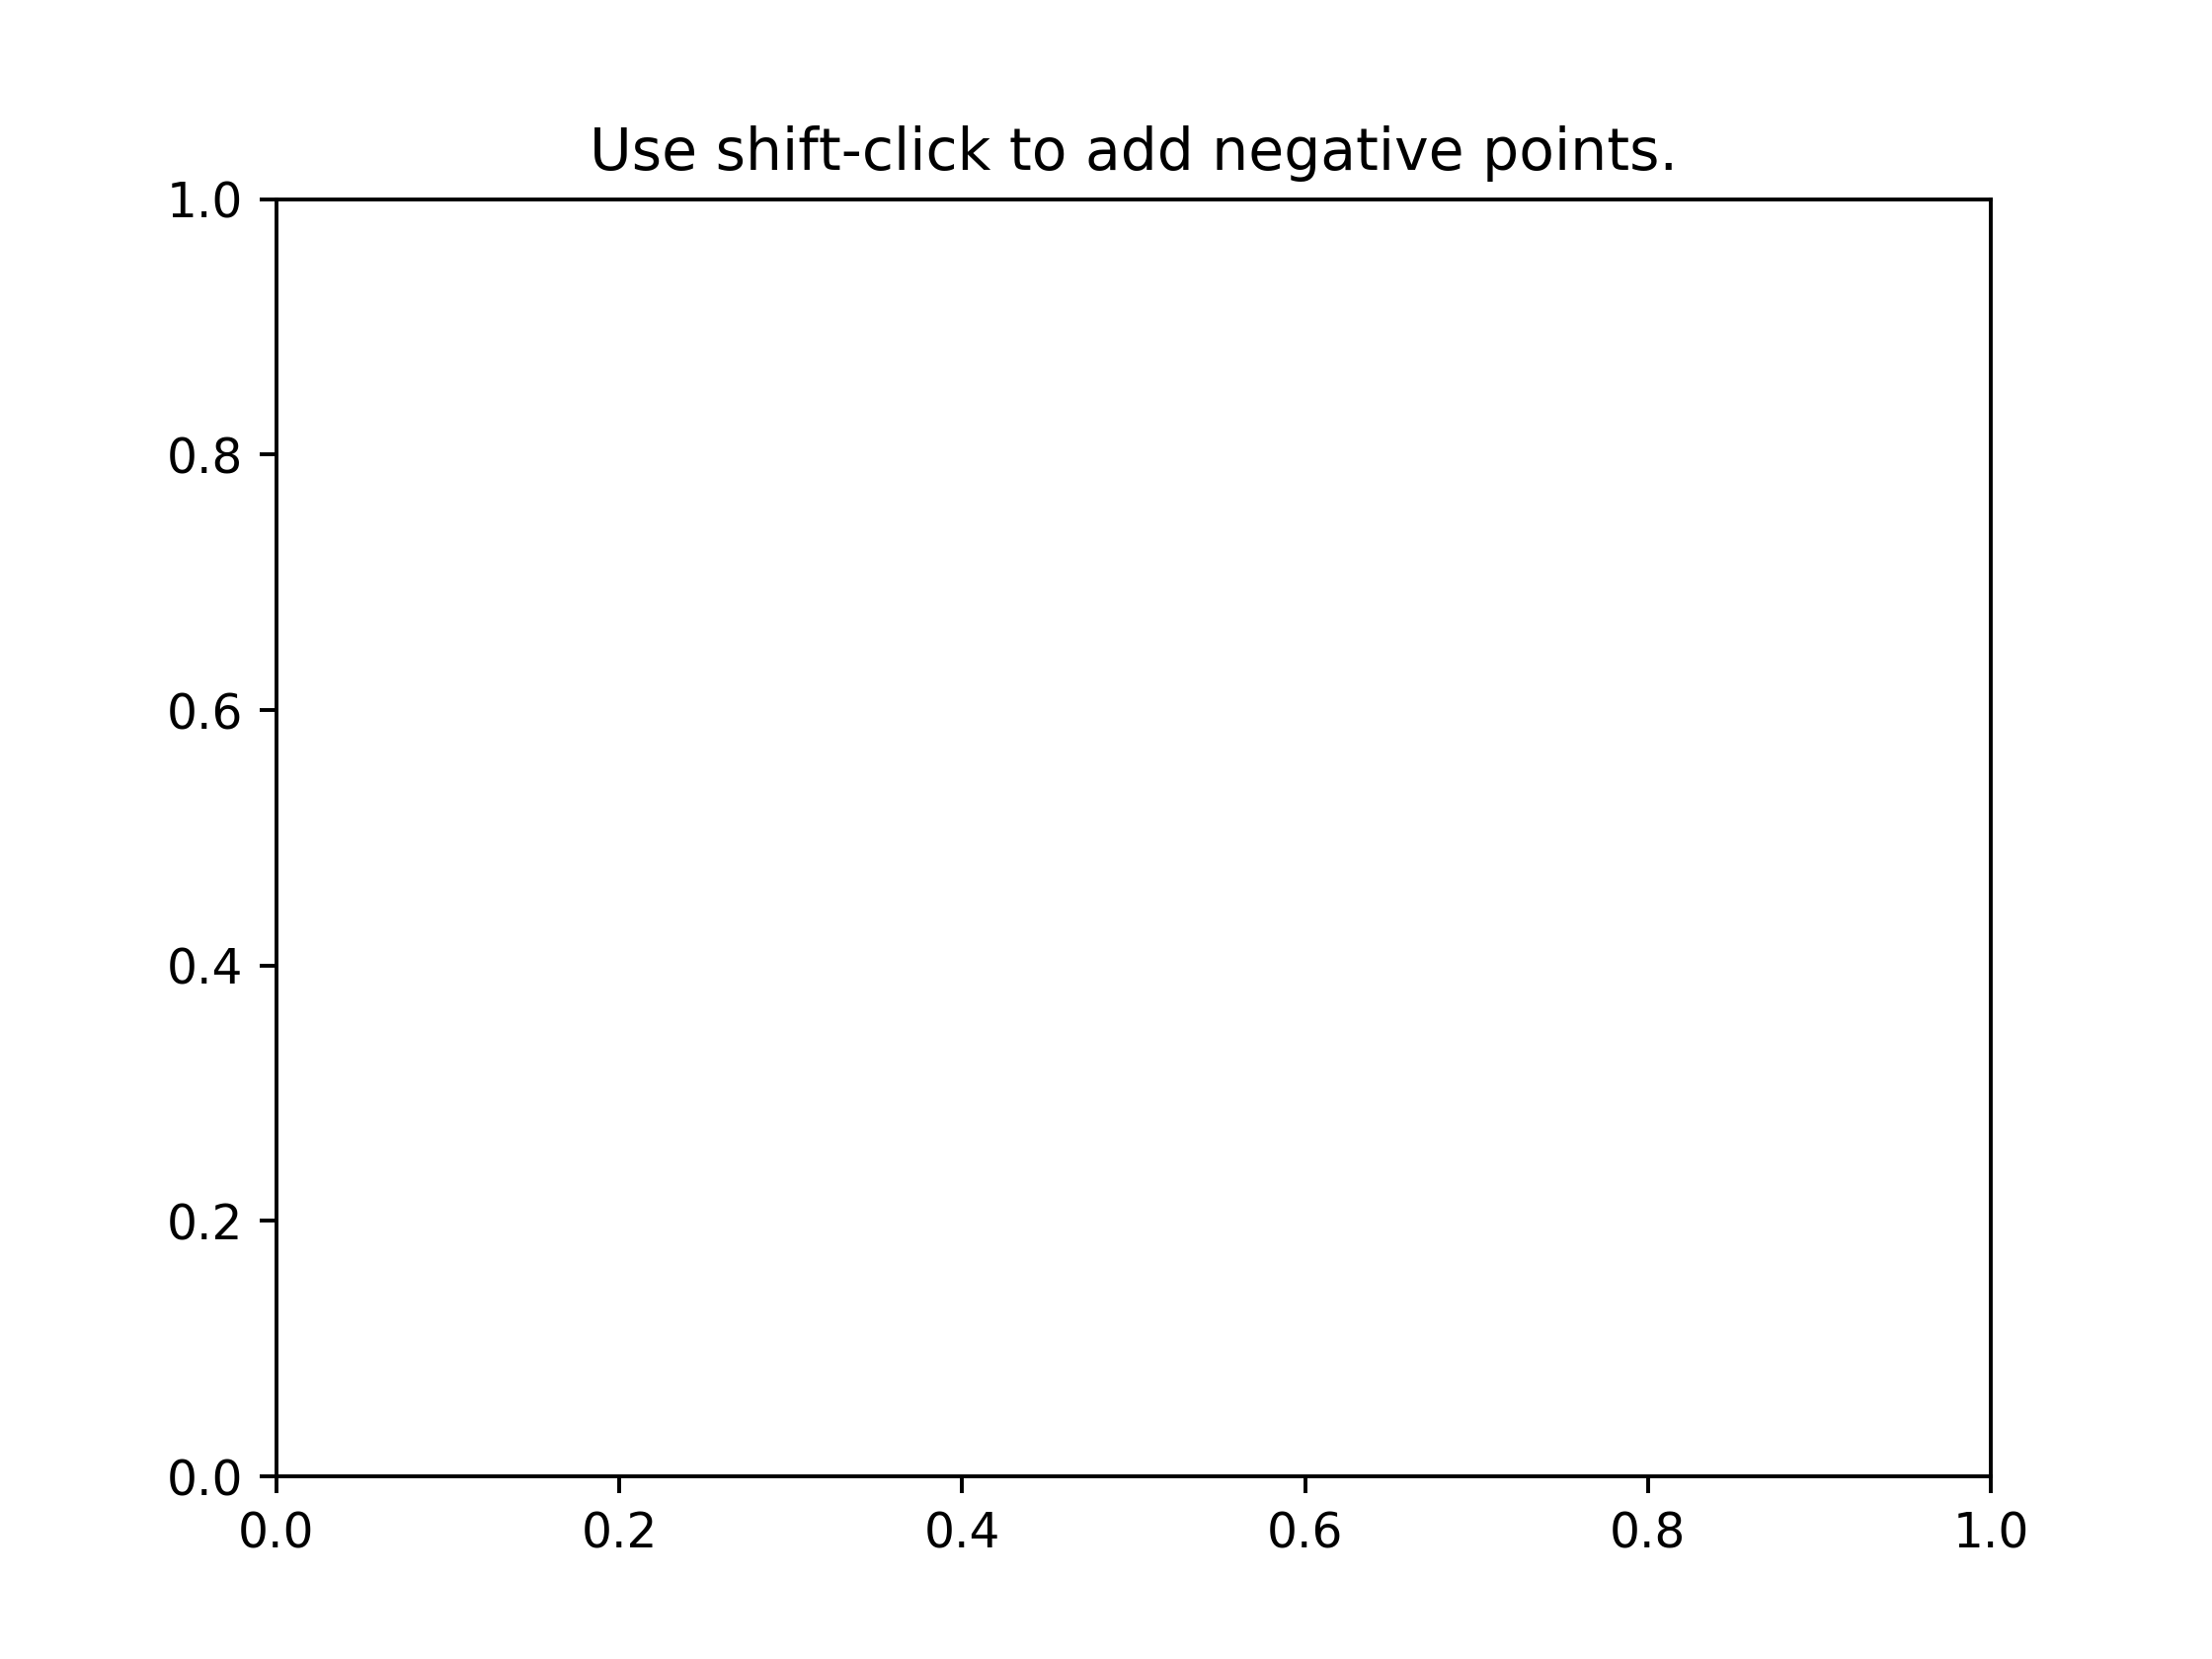

Text(0.5, 1.0, 'Use shift-click to add negative points.')

In [12]:
def onclick(event):
    global w,b,ldata,ax,line,xydata

    pos=np.array([[event.xdata],[event.ydata]])
    if event.key == 'shift': # add positive point
        color='or'
        label=1
    else: # add negative point
        color='ob'
        label=-1    
    ax.plot(pos[0],pos[1],color)
    ldata.append(label);
    xydata=np.vstack((xydata,pos.T))

    # call Perceptron function
    w,b=perceptron(xydata,np.array(ldata).flatten())

    # draw decision boundary
    q=-b/(w**2).sum() *w;
    if line is None:
        line, = ax.plot([q[0]-w[1],q[0]+w[1]],[q[1]+w[0],q[1]-w[0]],'b--')
    else:
        line.set_data([q[0]-w[1],q[0]+w[1]],[q[1]+w[0],q[1]-w[0]])
    return 
        
xydata=np.random.rand(0,2)
ldata=[]
w=np.zeros(2)
b=np.zeros(1)
line=None

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim(0,1)
plt.ylim(0,1)
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.title('Use shift-click to add negative points.')

<h3>Part Three: Make Predictions [Graded]</h3>

<p>Implement <b><code>classify_linear</code></b> that applies the weight vector and bias to the input vector. (The bias is an optional parameter. If it is not passed in, assume it is zero.) Make sure that the predictions returned are either 1 or -1.</p> 



In [13]:
def classify_linear(xs,w,b=None):
    """
    function preds=classify_linear(xs,w,b)
    
    Make predictions with a linear classifier
    Input:
    xs : n input vectors of d dimensions (nxd) [could also be a single vector of d dimensions]
    w : weight vector of dimensionality d
    b : bias (scalar)
    
    Output:
    preds: predictions (1xn)
    """    
    w = w.flatten()    
    predictions=np.zeros(xs.shape[0])
    
    # YOUR CODE HERE
    if b == None:
        b = 0
    Es = np.matmul(xs,w) + b
    for k in range(len(Es)):
        if Es[k] >=0:
            predictions[k] = 1
        else:
            predictions[k] = -1
    return predictions

In [14]:
# Run this self-test to check that your linear classifier correctly classifies the points in a linearly separable dataset

def test_linear1():
    xs = np.random.rand(50000,20)-0.5 # draw random data 
    w0 = np.random.rand(20)
    b0 =- 0.1 # with bias -0.1
    ys = classify_linear(xs,w0,b0)
    uniquepredictions=np.unique(ys) # check if predictions are only -1 or 1
    return set(uniquepredictions)==set([-1,1])

def test_linear2():
    xs = np.random.rand(1000,2)-0.5 # draw random data 
    w0 = np.array([0.5,-0.3]) # define a random hyperplane 
    b0 =- 0.1 # with bias -0.1
    ys = np.sign(xs.dot(w0)+b0) # assign labels according to this hyperplane (so you know it is linearly separable)
    return (all(np.sign(ys*classify_linear(xs,w0,b0))==1.0))  # the original hyperplane (w0,b0) should classify all correctly

runtest(test_linear1, 'test_linear1')
runtest(test_linear2, 'test_linear2')

Running Test: test_linear1 ... ✔ Passed!
Running Test: test_linear2 ... ✔ Passed!


In [ ]:
# Autograder test cell- worth 1 point
# runs test_linear1

In [ ]:
# Autograder test cell- worth 1 point
# runs test_linear2